In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### Gradient Ascent for Eigendecomposition

Reading the data and plotting the points

In [17]:
import scipy.io
X = scipy.io.loadmat('D:/iu/Semester 2/MLSP/assignment1/data/X.mat')

In [18]:
type(X)

dict

In [19]:
X = np.array(X['X'])

In [20]:
X.shape

(2, 1000)

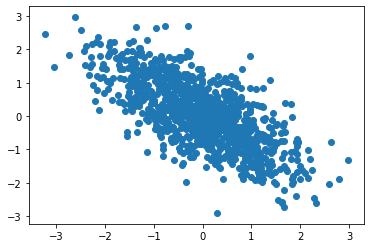

In [21]:
plt.scatter(X[0,:], X[1,:])
plt.show()

In [22]:
w1 = np.array([np.random.normal(0, 1, 1),np.random.normal(0, 1, 1)])
prev_lambda = 0 

In [23]:
for i in range(1,50):
    threshold = 0.000001
    print("******************")
    print("Iteration ",i)
    w1 = w1 / np.sqrt(w1[0]**2+w1[1]**2)
 
    z = np.dot(np.transpose(w1),X)
    lambda1 = np.dot(z,np.transpose(z))
    gradient = 2*X
    gradient = np.dot(gradient,np.transpose(X))
    gradient = np.dot(gradient,w1)
    diff = lambda1-prev_lambda
    print("diff",diff)
    prev_lambda = lambda1
    print("lambda",lambda1)
    print("grad",gradient)
    if diff<threshold:
        print("Difference in gradient is lesser than 0.000001 hence converged")
        break
    w1 = w1 + 0.001*gradient

******************
Iteration  1
diff [[553.0388493]]
lambda [[553.0388493]]
grad [[  656.21791179]
 [-1397.94827553]]
******************
Iteration  2
diff [[611.96009555]]
lambda [[1164.99894485]]
grad [[ 1625.17636327]
 [-2124.72997763]]
******************
Iteration  3
diff [[397.34614668]]
lambda [[1562.34509153]]
grad [[ 2148.73905476]
 [-2374.08435033]]
******************
Iteration  4
diff [[82.50250067]]
lambda [[1644.8475922]]
grad [[ 2288.69117711]
 [-2378.74587631]]
******************
Iteration  5
diff [[11.88229377]]
lambda [[1656.72988597]]
grad [[ 2324.95206157]
 [-2363.00034239]]
******************
Iteration  6
diff [[1.6089809]]
lambda [[1658.33886687]]
grad [[ 2335.93569086]
 [-2354.80798529]]
******************
Iteration  7
diff [[0.21601143]]
lambda [[1658.5548783]]
grad [[ 2339.64108281]
 [-2351.48459739]]
******************
Iteration  8
diff [[0.02896681]]
lambda [[1658.5838451]]
grad [[ 2340.95510728]
 [-2350.2245035 ]]
******************
Iteration  9
diff [[0.003883

Calculating the components necessary for subtracting the effect of first eigen vector from data.

In [24]:
s1 = np.dot(np.transpose(w1),X)
s1 = np.sqrt(np.sum(s1**2))

In [25]:
u1 = np.dot(np.transpose(X),w1)/s1

In [29]:
temp = np.dot(w1,s1)

In [30]:
temp = np.dot(temp,np.transpose(u1))

In [31]:
Xtrans = X - temp 

In [32]:
Xtrans.shape

(2, 1000)

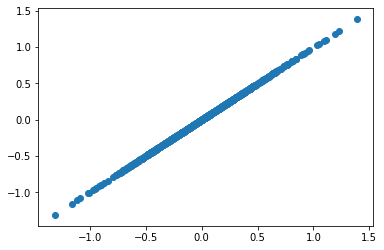

In [33]:
plt.scatter(Xtrans[0,:], Xtrans[1,:])
plt.show()

In [34]:
w2 = np.array([np.random.normal(0, 1, 1),np.random.normal(0, 1, 1)])
prev_lambda = 0 

In [35]:
for i in range(1,50):
    threshold = 1e-5
    print("******************")
    print("Iteration ",i)
    w2 = w2 / np.sqrt(np.sum(w2**2)+w2[1]**2)
 
    z = np.dot(np.transpose(w2),Xtrans)
    lambda1 = np.dot(z,np.transpose(z))
    gradient = 2*Xtrans
    gradient = np.dot(gradient,np.transpose(Xtrans))
    gradient = np.dot(gradient,w2)
    diff = lambda1-prev_lambda
    print("diff",diff)
    prev_lambda = lambda1
    print("lambda",lambda1)
    print("grad",gradient)
    if diff<threshold:
        print("Difference in gradient is lesser than 0.000001 hence converged")
        break
    w2 = w2 + 0.001*gradient

******************
Iteration  1
diff [[0.35839285]]
lambda [[0.35839285]]
grad [[-14.45135713]
 [-14.40336363]]
******************
Iteration  2
diff [[0.54999993]]
lambda [[0.90839278]]
grad [[-23.0073078 ]
 [-22.93089966]]
******************
Iteration  3
diff [[1.4079752]]
lambda [[2.31636798]]
grad [[-36.73945768]
 [-36.61744456]]
******************
Iteration  4
diff [[3.62484073]]
lambda [[5.94120872]]
grad [[-58.83914718]
 [-58.64374016]]
******************
Iteration  5
diff [[9.28380843]]
lambda [[15.22501715]]
grad [[-94.1906643 ]
 [-93.87785356]]
******************
Iteration  6
diff [[22.70880039]]
lambda [[37.93381753]]
grad [[-148.67646964]
 [-148.18270948]]
******************
Iteration  7
diff [[47.2781963]]
lambda [[85.21201383]]
grad [[-222.83293435]
 [-222.09289778]]
******************
Iteration  8
diff [[66.67988649]]
lambda [[151.89190033]]
grad [[-297.5063724 ]
 [-296.51834253]]
******************
Iteration  9
diff [[49.49208255]]
lambda [[201.38398287]]
grad [[-342.563

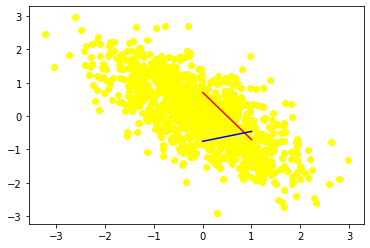

In [36]:
plt.scatter(X[0,:], X[1,:],color="yellow");
plt.plot(w1,color="red");
plt.plot(w2,color="blue");